In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# load disease-infection dataframe
df = pd.read_csv('idb_odp_2001-2019.csv', index_col = False)

In [3]:
df.shape

(164433, 9)

In [4]:
df.head(20)

,Disease,County,Year,Sex,Cases,Population,Rate,Lower_95__CI,Upper_95__CI
0,Amebiasis,Alameda,2001,Female,7.0,746596,0.938*,0.377,1.932
1,Amebiasis,Alameda,2001,Male,9.0,718968,1.252*,0.572,2.376
2,Amebiasis,Alameda,2001,Total,16.0,1465564,1.092*,0.624,1.773
3,Amebiasis,Alameda,2002,Female,4.0,747987,0.535*,0.146,1.369
4,Amebiasis,Alameda,2002,Male,5.0,720481,0.694*,0.225,1.620
5,Amebiasis,Alameda,2002,Total,9.0,1468468,0.613*,0.280,1.163
6,Amebiasis,Alameda,2003,Female,1.0,747441,0.134*,0.003,0.745
7,Amebiasis,Alameda,2003,Male,5.0,719746,0.695*,0.226,1.621
8,Amebiasis,Alameda,2003,Total,7.0,1467187,0.477*,0.192,0.983
9,Amebiasis,Alameda,2004,Female,3.0,746723,0.402*,0.083,1.174


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164433 entries, 0 to 164432
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Disease       164433 non-null  object 
 1   County        164433 non-null  object 
 2   Year          164433 non-null  int64  
 3   Sex           164433 non-null  object 
 4   Cases         160313 non-null  float64
 5   Population    164433 non-null  int64  
 6   Rate          164433 non-null  object 
 7   Lower_95__CI  159452 non-null  float64
 8   Upper_95__CI  159452 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 11.3+ MB


In [6]:
# check for missing values if any replace or drop or fill missing value
df.isnull().sum()

Disease            0
County             0
Year               0
Sex                0
Cases           4120
Population         0
Rate               0
Lower_95__CI    4981
Upper_95__CI    4981
dtype: int64

In [7]:
df['Cases'].value_counts()

0.0       126085
1.0        10019
2.0         4373
3.0         2615
4.0         1697
           ...  
1474.0         1
2398.0         1
1650.0         1
739.0          1
338.0          1
Name: Cases, Length: 906, dtype: int64

In [8]:
df['Lower_95__CI'].value_counts()

0.000    125814
0.003      1216
0.006       998
0.002       971
0.001       662
          ...  
8.195         1
6.769         1
5.954         1
3.910         1
1.435         1
Name: Lower_95__CI, Length: 8446, dtype: int64

In [9]:
df['Upper_95__CI'].value_counts()

0.074     247
0.038     201
0.076     201
0.252     195
0.968     193
         ... 
52.855      1
8.601       1
50.143      1
5.396       1
3.589       1
Name: Upper_95__CI, Length: 14065, dtype: int64

In [10]:
df.dropna(inplace = True)

In [11]:
df.isnull().sum()

Disease         0
County          0
Year            0
Sex             0
Cases           0
Population      0
Rate            0
Lower_95__CI    0
Upper_95__CI    0
dtype: int64

Missing data dropped

In [12]:
# check for duplicates, if any then handle duplicate
df.duplicated().sum()

0

No duplicated values

<AxesSubplot:xlabel='Disease', ylabel='Lower_95__CI'>

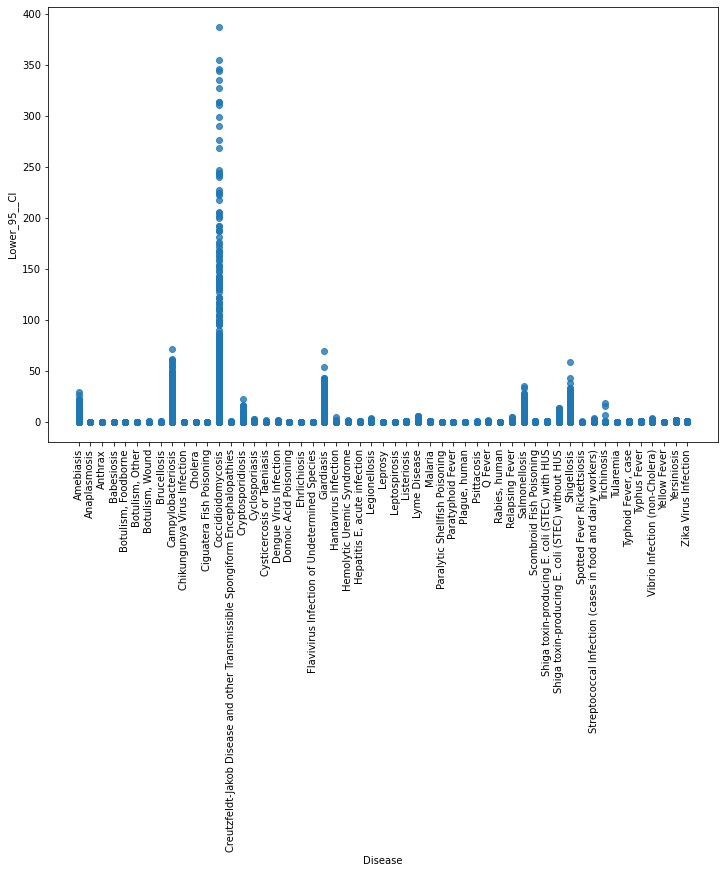

In [19]:
# check for outliers, if any then drop outliers
plt.figure(figsize = (12, 8))
plt.xticks(rotation = 'vertical')
sns.regplot("Disease", "Lower_95__CI", data = df, fit_reg=False )

In [20]:
df = df[df['Lower_95__CI'] <= 200]

Dropped values above 200 in the "Lower_95_CI" column

<AxesSubplot:xlabel='Disease', ylabel='Upper_95__CI'>

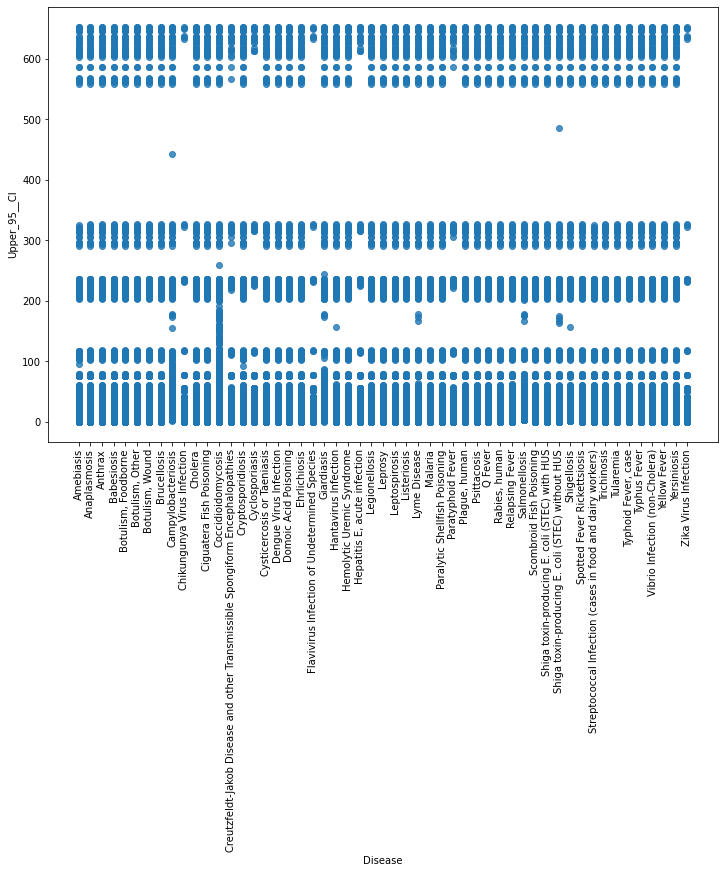

In [21]:
# check for outliers, if any then drop outliers
plt.figure(figsize = (12, 8))
plt.xticks(rotation = 'vertical')
sns.regplot("Disease", "Upper_95__CI", data = df, fit_reg=False )

In [22]:
df = df[df['Upper_95__CI'] <= 400]

Dropped values above 400 in the "Upper_95__CI" column

C:\Users\tajag\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Disease', ylabel='Cases'>

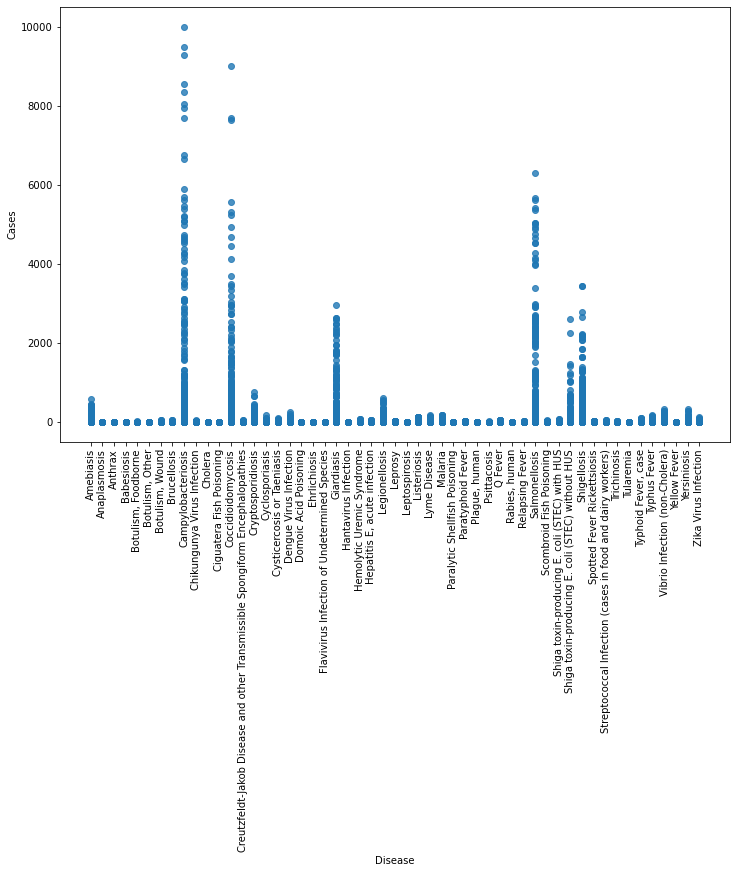

In [24]:
plt.figure(figsize = (12, 8))
plt.xticks(rotation = 'vertical')
sns.regplot("Disease", "Cases", data = df, fit_reg=False )

In [25]:
df = df[df['Cases'] < 6000]

Dropped values above 6000 in the "Cases" column

In [26]:
# save dataframe for exploration
df.to_csv('infectious_disease.csv', index = False)